## Learning From Data: Exercise 1.4

This problem wants us to visualize the perceptron learning algorithm (PLA) on 20 random data points.  Let's get to it!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

For visualization's sake, we'll limit our points to the rectangle $[-10, 10] \times [-10, 10] \subset \mathbb{R}^2$. To do this, we'll sample each $x, y \sim 20 * U(0, 1) - 10$. To account for our bias term, we prepend a 1 to each sample.

In [2]:
def generateSamples(num_samples=20):
	samples = np.random.rand(num_samples, 2)
	samples *= 20
	samples -= 10
	return np.hstack((np.ones((num_samples, 1)), samples)) # add 1s for bias

We need to pick a target function too.  We'll just randomly sample weights between 0 and 1:

In [3]:
def generateTarget():
	f = np.random.rand(3)
	return f

Since we have our target function, we can realize the true labels for these points with our decision rule: $f(\mathbf{x}) = \text{sign}(\mathbf{w}^T\mathbf{x})$.

In [4]:
def classifySamples(samples, f):
	y = f.dot(samples.T)
	return np.where(y > 0, 1, -1)

The last thing to do is run the learning algorithm! We can use our result from Exercise 1.3 to verify if an example is misclassified by evaluating the quantity $y(t)\mathbf{w}^T(t)\mathbf{x}(t)$. Since our data is linearly separable, we define convergence as perfectly classifying all the samples. We begin by initializing our weight vector to $\mathbf{0}:$

In [5]:
def runPLA(X, y):
	w = np.zeros(3)
	epoch = 0
	notConverged = True
	while notConverged:
		notConverged = False
		epoch += 1
		print "Epoch: {}".format(epoch)
		for t in xrange(len(X)):
			if w.dot(X[t]) * y[t] <= 0:
				w += y[t] * X[t]
				notConverged = True
	print "Took {} epochs to converge".format(epoch)
	return w # return our hypothesis

We define some functions to plot our results below. The **convertWeightsToLine** function takes a weight vector $[w_1, w_2, w_3]$ and converts it into a line of the form $y = mx + b$.

In [6]:
def plotSamples(samples, y):
	posSamples = samples[y == 1]
	negSamples = samples[y == -1]
	plt.plot(posSamples[:, 1], posSamples[:, 2], 'bo')
	plt.plot(negSamples[:, 1], negSamples[:, 2], 'rx')
	

def convertWeightsToLine(function):
	slope = -1.0 * function[1] / function[2]
	intercept = -1.0 * function[0] / function[2]
	return lambda x : slope * x + intercept

def plotFunctions(f, g):
	f = convertWeightsToLine(f)
	g = convertWeightsToLine(g)
	x = np.linspace(-10, 10, 100)
	plt.plot(x, f(x), '--')
	plt.plot(x, g(x), 'g-')

It's showtime!

Epoch: 1
Epoch: 2
Took 2 epochs to converge


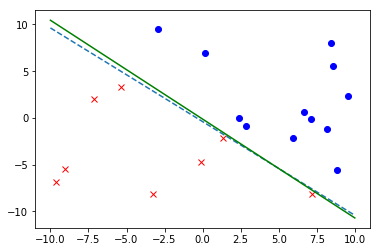

In [7]:
f = generateTarget()
samples = generateSamples()
y = classifySamples(samples, f)
g = runPLA(samples, y)
plotSamples(samples, y)
plotFunctions(f, g)
plt.show()

Pretty cool huh? Because of the randomness it's hard to place a legend somewhere without blocking part of the graph, but the dashed blue line represents the target function while the green line represents our hypothesis.